In [1]:
import functools
import jax
import os
import html

from datetime import datetime
from jax import numpy as jp
jax.config.update("jax_debug_nans", False)
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

from IPython.display import HTML, clear_output, display

import flax
from brax import envs
from brax.io import model
from brax.io import json
from brax.io import html

import shutil

from src.pods.Pods import train as train_pods
from src.hds.Hds import train as train_hds
from src.env.Pendulum import InvertedPendulum
import pickle




In [2]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)
print(jax.devices())

cpu
[CpuDevice(id=0)]


In [3]:
env = InvertedPendulum(target=jp.array([1]))
state = jax.jit(env.reset)(rng=jax.random.PRNGKey(seed=0))

#HTML(html.render(env.sys, [state.pipeline_state]))

In [4]:
ckpt_dir = './tmp/flax_ckpt'

if os.path.exists(ckpt_dir):
    shutil.rmtree(ckpt_dir)  # Remove any existing checkpoints from the last notebook run.

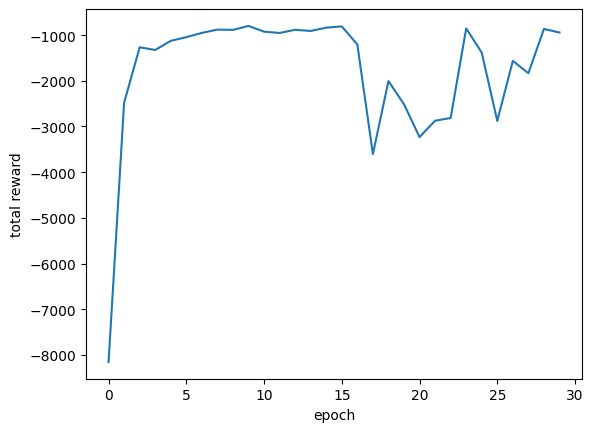

big epoch: 29 small epoch: 0 Loss 1.1484123382592226e-05
big epoch: 29 small epoch: 1 Loss 1.3782483302479986e-05
big epoch: 29 small epoch: 2 Loss 1.3374291764679504e-05
big epoch: 29 small epoch: 3 Loss 1.4160274604437373e-05
big epoch: 29 small epoch: 4 Loss 1.645460325194712e-05
big epoch: 29 small epoch: 5 Loss 3.2235530113170536e-05
big epoch: 29 small epoch: 6 Loss 3.6169125302974524e-05
big epoch: 29 small epoch: 7 Loss 2.8840670604451975e-05
big epoch: 29 small epoch: 8 Loss 2.120885929540694e-05
big epoch: 29 small epoch: 9 Loss 1.874140576497266e-05
big epoch: 29 small epoch: 10 Loss 1.5120346482473428e-05
big epoch: 29 small epoch: 11 Loss 1.5207444182952948e-05
big epoch: 29 small epoch: 12 Loss 1.528244440794581e-05
big epoch: 29 small epoch: 13 Loss 1.4818334399428393e-05
big epoch: 29 small epoch: 14 Loss 1.2662361006419284e-05
big epoch: 29 small epoch: 15 Loss 1.2563921889488035e-05
big epoch: 29 small epoch: 16 Loss 2.6747521060427315e-05
big epoch: 29 small epoch: 1

In [5]:

def progress_f(x_data,y_data,epoch,reward):
    print(reward)
    x_data.append(epoch)
    y_data.append(reward)
    clear_output(wait=True)
    plt.xlabel('epoch')
    plt.ylabel('total reward')
    plt.plot(x_data, y_data)
    plt.show()

#policy = train_hds(env,trajectory_length=100 ,num_samples=50,epochs=4, inner_epochs=20, alpha_a=1e-5, init_learning_rate=1e-3, init_noise=0.1, noise_decay=0.5, progress_fn=progress_f) 
policy = train_pods(env,trajectory_length=100 ,num_samples=100,epochs=30, inner_epochs=20, alpha_a=8e-5, init_learning_rate=1e-3, progress_fn=progress_f)

In [6]:
f = open("reward.txt", "w")
g = open("actions.txt", "w")
inference_fn = policy()
rollout = []
rng = jax.random.PRNGKey(seed=1)
state = env.reset(rng=rng)
reward = []
actions = []
for _ in range(1000):
  rollout.append(state.pipeline_state)
  act_rng, rng = jax.random.split(rng)
  #print(state.obs)
  act = inference_fn(state.obs)
  print(act)
  reward.append(state.reward)
  state = env.step(state, act)
  #print(state.reward)
  actions.append(act)

  
print(reward, file=f)
print(actions, file=g)

[-0.00020464]
[0.01076748]
[0.02261859]
[0.03128685]
[0.03532332]
[0.03972127]
[0.07016213]
[0.15003192]
[0.27139456]
[0.30389029]
[0.30699785]
[0.30937883]
[0.30180658]
[0.31600338]
[0.30933706]
[0.3039576]
[0.29988304]
[0.29639188]
[0.29468944]
[0.30238212]
[0.29307778]
[0.24850357]
[0.17593588]
[0.15731718]
[0.17615533]
[0.18052774]
[0.18987701]
[0.21521043]
[0.25736175]
[0.27671406]
[0.27947608]
[0.27897643]
[0.28004991]
[0.27465923]
[0.26364254]
[0.24234808]
[0.20920042]
[0.19347609]
[0.12937532]
[0.07757996]
[0.03668662]
[-0.04384504]
[-0.09806996]
[-0.11520214]
[-0.11852736]
[-0.120333]
[-0.12165021]
[-0.14870046]
[-0.13770887]
[-0.1369975]
[-0.13471144]
[-0.12820645]
[-0.12390833]
[-0.12212373]
[-0.11835501]
[-0.11393401]
[-0.11274449]
[-0.10843005]
[-0.10564616]
[-0.10280874]
[-0.10160688]
[-0.10471199]
[-0.10282098]
[-0.10038446]
[-0.0966426]
[-0.09503136]
[-0.0909866]
[-0.0846374]
[-0.08211313]
[-0.07891883]
[-0.07549705]
[-0.07195387]
[-0.06832816]
[-0.06475815]
[-0.0627790

In [7]:
yes=html.render(env.sys.replace(), rollout)
with open("data.html", "w") as file:
    file.write(yes)